
## Week 9 handin
### 01 Assignment

#### Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.


### 02 Status
I have completed the entire iris exercise 

### 03 Solutions

In [83]:
# Imports 
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle



In [89]:
## Load 'data/iris_data.csv' into a dataframe (use decimal=',') 
data = pd.read_csv("../notebooks/data/iris_data.csv", decimal=',')

## Remove the 2 `Petal` columns. 
dataFrame = pd.DataFrame(data)
dataFrame.drop('Petal length',
  axis='columns', inplace=True)
dataFrame.drop('Petal width',
  axis='columns', inplace=True)
 
dataFrame

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [73]:
## Get unique labels (Species column)
labels = dataFrame['Species'].unique()
labels

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

<IPython.core.display.Javascript object>


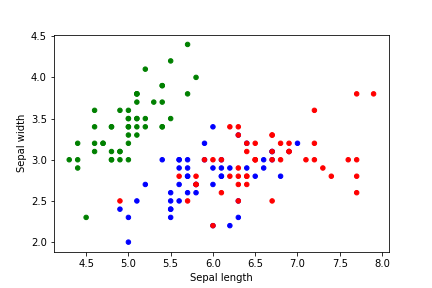

In [92]:
## Plot with a scatter plot each iris flower sample colored by label (3 different colors)

colors = {'I. virginica':'red', 'I. setosa':'green', 'I. versicolor':'blue'}

ax1 = dataFrame.plot.scatter(x='Sepal length',
                       y='Sepal width',
                        c=dataFrame['Species'].map(colors))



In [80]:
# Needed to do the clusters 
dataFrame.drop(['Species'],'columns',inplace=True)

In [85]:



## Use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth 
from sklearn.cluster import estimate_bandwidth


es_bandwidth = estimate_bandwidth(dataFrame, quantile=0.2)
print("estimated bandwith: " + str(es_bandwidth))

from sklearn.cluster import MeanShift
analyzer = MeanShift(es_bandwidth) 
analyzer.fit(dataFrame)
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
n_clusters = len(np.unique(labels))

#print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
print('labels:\n', labels)
print('\n\nCluster centers:\n', cluster_centers)
print('\n\nnumber of clusters:', n_clusters)


estimated bandwith: 0.5782805830511767
labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Cluster centers:
 [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]


number of clusters: 3


/Users/frederikdahl/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass bandwidth=0.5782805830511767 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<IPython.core.display.Javascript object>


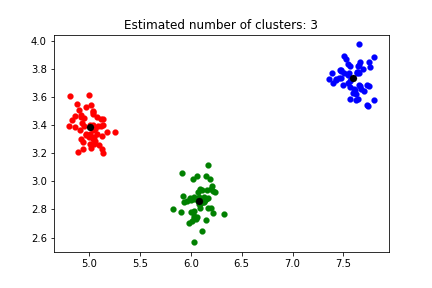

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [93]:
from itertools import cycle
from sklearn.datasets import make_blobs

data_2d, _ = make_blobs(n_samples=len(dataFrame), centers=cluster_centers, cluster_std=0.1)

analyzer.fit(data_2d)
labels = analyzer.labels_
cluster_centers = analyzer.cluster_centers_
n_clusters = len(np.unique(labels))

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    #add a dot for the cluster centers
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

### Compare the 2 plots (colored by actual labels vs. colored by cluster label)
You can see in the plots that the labels can be categorized into three clusters. 


### Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.
If you chance the quantile we get 2 extra clusters
